In [ ]:
# metamarkers

In [2]:
library(data.table)
library(dplyr)
library(ggplot2)
library(MetaMarkers)
library(RColorBrewer)

In [3]:
dirs = c('Cebrian_Silla', 'Govek', 'Hamed', 'La_Manno', 'Marcy', 'Scala',
         'Steuernagel', 'Tasic', 'Yao_Cell', 'Yao_Nature', 'Zeisel')
studies = c('Cebrian_Silla', 'Govek', 'Hamed', 'La_Manno', 'Marcy', 'Scala',
         'Steuernagel', 'Tasic', 'Yao_SSv4', 'Yao_Nature', 'Zeisel')
length(dirs)

[1] 11

In [4]:
# load markers
markers = list(
    cebrian_silla = read_markers(paste0(dirs[1], "/", studies[1], "_celltype_markers_A1N2.csv.gz")),
    govek = read_markers(paste0(dirs[2], "/", studies[2], "_celltype_markers_A1N2.csv.gz")),
    hamed = read_markers(paste0(dirs[3], "/", studies[3], "_celltype_markers_A1N2.csv.gz")),
    la_manno = read_markers(paste0(dirs[4], "/", studies[4], "_celltype_markers_A1N2.csv.gz")),

    marcy = read_markers(paste0(dirs[5], "/", studies[5], "_celltype_markers_A1N2.csv.gz")),
    scala = read_markers(paste0(dirs[6], "/", studies[6], "_celltype_markers_A1N2.csv.gz")),
    steuernagel = read_markers(paste0(dirs[7], "/", studies[7], "_celltype_markers_A1N2.csv.gz")),
    tasic = read_markers(paste0(dirs[8], "/", studies[8], "_celltype_markers_A1N2.csv.gz")),

    yao_cell = read_markers(paste0(dirs[9], "/", studies[9], "_celltype_markers_A1N2.csv.gz")),
    yao_nature = read_markers(paste0(dirs[10], "/", studies[10], "_celltype_markers_A1N2.csv.gz")),
    zeisel = read_markers(paste0(dirs[11], "/", studies[11], "_celltype_markers_A1N2.csv.gz"))
)

In [5]:
options(warn = -1)
meta_markers = make_meta_markers(markers, fc_threshold = 1.5, common_genes_only = FALSE, detailed_stats = TRUE)

In [6]:
# 62,131 genes in total
dim(meta_markers)
head(meta_markers)

[1] 186393     24

group cell_type      rank gene    recurrence auroc     fold_change
1 all   Ascl1_positive 1    Ascl1   11         0.8837390 9.400003   
2 all   Ascl1_positive 2    Npas3   10         0.6022179 3.840082   
3 all   Ascl1_positive 3    Ptprz1   9         0.6355696 2.962869   
4 all   Ascl1_positive 4    Slc6a1   9         0.6049126 3.229102   
5 all   Ascl1_positive 5    Dlx1     9         0.5764454      NaN   
6 all   Ascl1_positive 6    Dlx6os1  9         0.5671296      NaN   
  fold_change_detection expression precision ⋯ govek hamed la_manno marcy scala
1 5.255926              273.6851   0.8877423 ⋯ TRUE   TRUE TRUE      TRUE  TRUE
2 1.612817              266.6898   0.8136189 ⋯ TRUE   TRUE TRUE     FALSE  TRUE
3 1.674272              410.3469   0.8076881 ⋯ TRUE   TRUE TRUE     FALSE FALSE
4 1.950109              187.9752   0.8283233 ⋯ TRUE  FALSE TRUE     FALSE  TRUE
5 4.535988                   NaN   0.8668001 ⋯ TRUE  FALSE TRUE      TRUE  TRUE
6 4.378438                   NaN   0.8643402 ⋯ TRUE  FALSE TRUE      TRUE  TRUE
  steuernagel tasic yao_cell yao_nature zeisel
1  TRUE       TRUE  TRUE     TRUE       TRUE  
2  TRUE       TRUE  TRUE     TRUE       TRUE  
3  TRUE       TRUE  TRUE     TRUE       TRUE  
4  TRUE       TRUE  TRUE     TRUE       TRUE  
5 FALSE       TRUE  TRUE     TRUE       TRUE  
6 FALSE       TRUE  TRUE     TRUE       TRUE

In [82]:
# save
write.table(meta_markers, file = 'A1N2_metamarkers.csv', sep = ',', row.names = F,
           col.names = T, quote = F)

In [7]:
# dfs for each cell type
tab1 = meta_markers[meta_markers$cell_type=='double_positive',]
tab2 = meta_markers[meta_markers$cell_type=='Neurog2_positive',]
tab3 = meta_markers[meta_markers$cell_type=='Ascl1_positive',]

head(tab1, n = 20)

group cell_type       rank gene          recurrence auroc     fold_change
1  all   double_positive  1   Neurog2       11         0.9042953 9.9277076  
2  all   double_positive  2   Cacna2d1       5         0.6240437       NaN  
3  all   double_positive  3   Rasgef1b       5         0.6208366       NaN  
4  all   double_positive  4   Nefl           5         0.6133472 1.3955352  
5  all   double_positive  5   Myo1b          5         0.6074479 1.5096993  
6  all   double_positive  6   Lingo1         5         0.6073891 1.4025631  
7  all   double_positive  7   Slit3          5         0.5980726 0.9655486  
8  all   double_positive  8   Sorbs2         5         0.5957226 1.3928534  
9  all   double_positive  9   Ajap1          5         0.5934267 1.2633525  
10 all   double_positive 10   Plxnd1         5         0.5913307 1.2487772  
11 all   double_positive 11   Cracdl         4         0.6800151 1.4786920  
12 all   double_positive 12   Epha4          4         0.6406443       NaN  
13 all   double_positive 13   Lhx2           4         0.6246185       NaN  
14 all   double_positive 14   B230216N24Rik  4         0.6205395 2.1275241  
15 all   double_positive 15   Nedd4l         4         0.6182673 1.3314785  
16 all   double_positive 16   Emx1           4         0.6143971       NaN  
17 all   double_positive 17   Rtn4rl1        4         0.6091657 0.9812218  
18 all   double_positive 18   Cyp46a1        4         0.6066390 1.1966861  
19 all   double_positive 19   Atp2b2         4         0.6063977 1.8649782  
20 all   double_positive 20   Nrn1           4         0.6063638       NaN  
   fold_change_detection expression precision  ⋯ govek hamed la_manno marcy
1  11.0837631            166.65133  0.25241394 ⋯  TRUE  TRUE  TRUE     TRUE
2   1.2515454                  NaN  0.08229239 ⋯ FALSE FALSE FALSE     TRUE
3   1.4118371                  NaN  0.09014099 ⋯ FALSE FALSE FALSE     TRUE
4   1.3131198             82.66364  0.07879787 ⋯ FALSE  TRUE FALSE    FALSE
5   1.7806400             50.76413  0.03959158 ⋯ FALSE    NA FALSE    FALSE
6   1.2667001            146.07637  0.08161828 ⋯ FALSE  TRUE FALSE     TRUE
7   0.7583770              0.00000  0.08511201 ⋯ FALSE  TRUE FALSE    FALSE
8   1.0811522            271.57555  0.07549575 ⋯ FALSE FALSE FALSE     TRUE
9   1.0392625              0.00000  0.08808275 ⋯ FALSE  TRUE FALSE    FALSE
10  1.1097412              0.00000  0.08753701 ⋯ FALSE  TRUE FALSE    FALSE
11  1.1690697             43.16306  0.01869066 ⋯ FALSE    NA    NA       NA
12  1.3646295            329.27914  0.08758718 ⋯ FALSE FALSE FALSE    FALSE
13  1.6426007            149.25655  0.08959818 ⋯ FALSE FALSE FALSE    FALSE
14  1.7268494              0.00000          NA ⋯    NA    NA    NA     TRUE
15  1.2534311            171.24928  0.03556473 ⋯ FALSE    NA FALSE     TRUE
16  1.8662688              0.00000  0.11532669 ⋯ FALSE FALSE FALSE     TRUE
17  0.8850316              0.00000  0.07522840 ⋯ FALSE FALSE FALSE    FALSE
18  1.1748219             37.98369  0.03649646 ⋯ FALSE    NA FALSE    FALSE
19  1.1730620            250.31807  0.08297427 ⋯ FALSE  TRUE FALSE     TRUE
20  1.7715775            272.98493  0.09415404 ⋯ FALSE FALSE FALSE     TRUE
   scala steuernagel tasic yao_cell yao_nature zeisel
1   TRUE  TRUE        TRUE TRUE      TRUE       TRUE 
2  FALSE  TRUE        TRUE TRUE     FALSE      FALSE 
3   TRUE FALSE        TRUE TRUE      TRUE      FALSE 
4  FALSE  TRUE        TRUE TRUE      TRUE      FALSE 
5   TRUE  TRUE        TRUE TRUE      TRUE      FALSE 
6  FALSE FALSE        TRUE TRUE      TRUE      FALSE 
7   TRUE FALSE        TRUE TRUE      TRUE      FALSE 
8   TRUE FALSE        TRUE TRUE      TRUE      FALSE 
9   TRUE FALSE        TRUE TRUE      TRUE      FALSE 
10  TRUE FALSE        TRUE TRUE      TRUE      FALSE 
11  TRUE    NA        TRUE TRUE      TRUE         NA 
12  TRUE FALSE        TRUE TRUE      TRUE      FALSE 
13 FALSE FALSE        TRUE TRUE      TRUE       TRUE 
14    NA  TRUE        TRUE TRUE   

In [8]:
table(tab1$recurrence)
tab1$gene[tab1$recurrence>3]


    0     1     2     3     4     5    11 
58187  3005   622   210    97     9     1 

[1] "Neurog2"       "Cacna2d1"      "Rasgef1b"      "Nefl"         
  [5] "Myo1b"         "Lingo1"        "Slit3"         "Sorbs2"       
  [9] "Ajap1"         "Plxnd1"        "Cracdl"        "Epha4"        
 [13] "Lhx2"          "B230216N24Rik" "Nedd4l"        "Emx1"         
 [17] "Rtn4rl1"       "Cyp46a1"       "Atp2b2"        "Nrn1"         
 [21] "Ptk2b"         "Chst1"         "Rbfox3"        "Wnt4"         
 [25] "Mapk4"         "Ptpn5"         "Nefm"          "Adcyap1"      
 [29] "Kcnv1"         "Cacng3"        "Ngef"          "Pou3f2"       
 [33] "Acvr1c"        "Erc2"          "Car4"          "Rgl1"         
 [37] "Kalrn"         "Olfm1"         "Dusp14"        "Unc5d"        
 [41] "Rasl11b"       "Tyro3"         "Arhgap20"      "Lamp5"        
 [45] "Prmt8"         "A330009N23Rik" "Ptprk"         "Zfp703"       
 [49] "Bdnf"          "Coch"          "Rin1"          "Nell2"        
 [53] "Miat"          "Kitl"          "Boc"           "Gabrd"        
 [57] "Lzts3"         "Cdh8"          "Pcsk2"         "Prag1"        
 [61] "Rapgef5"       "Ppp1r1b"       "Nbl1"          "Dgkb"         
 [65] "Neurod1"       "Mical2"        "Tenm4"         "Egr3"         
 [69] "Lifr"          "Adam11"        "Gpr88"         "Cd34"         
 [73] "Palmd"         "Pitpnm2"       "Igfbp7"        "Drc1"         
 [77] "Map6d1"        "Pak6"          "Gcnt2"         "Slc24a4"      
 [81] "Anxa11"        "Rnd1"          "Thrsp"         "Ddit4l"       
 [85] "Tnks1bp1"      "Plat"          "Cux2"          "Bhlhe22"      
 [89] "Tmem108"       "Hspa1b"        "Dmrta2"        "Pamr1"        
 [93] "Ptgs2"         "Ppfibp1"       "Psrc1"         "Rbm20"        
 [97] "9430041J12Rik" "Cxcl12"        "Enpp2"         "Ccnyl1"       
[101] "Robo3"         "Tiam2"         "1700016K19Rik" "Ccbe1"        
[105] "Tenm2"         "Cdkn1c"        "Cplx2"

In [9]:
colSums(tab1[tab1$recurrence>0,14:23], na.rm = T)

cebrian_silla         govek         hamed      la_manno         marcy 
           42            54          1753           135           245 
        scala   steuernagel         tasic      yao_cell    yao_nature 
          487           503           811           892           282

In [10]:
# Alex's target genes
alex = c('Bcl11a', 'Bcl11b', 'Nhlh1', 'Nhlh2', 'Sox2', 'Sox9', 'Gfap',
        'Pax6', 'Prom1', 'Foxj1', 'Rbfox3', 'Nes', 'Hopx', 'Dcx',
        'Bdnf', 'Pdgfra', 'S100b')
length(alex)

[1] 17

In [11]:
tab1[match(alex, tab1$gene),]

group cell_type       rank  gene   recurrence auroc     fold_change
1  all   double_positive   857 Bcl11a 2          0.5250918 1.2792208  
2  all   double_positive  3944 Bcl11b 1          0.4293018 0.3867562  
3  all   double_positive  2673 Nhlh1  1          0.5230044 1.1479395  
4  all   double_positive  2490 Nhlh2  1          0.5253576 1.3036415  
5  all   double_positive 61077 Sox2   0          0.4822494       NaN  
6  all   double_positive   368 Sox9   2          0.5833445       NaN  
7  all   double_positive  2285 Gfap   1          0.5288437 0.4807588  
8  all   double_positive   185 Pax6   3          0.5773335       NaN  
9  all   double_positive  9218 Prom1  0          0.5234672 1.0301605  
10 all   double_positive  3378 Foxj1  1          0.5145752 0.6528733  
11 all   double_positive    23 Rbfox3 4          0.6024653 1.6257382  
12 all   double_positive  6384 Nes    0          0.5349051       NaN  
13 all   double_positive  7356 Hopx   0          0.5302615       NaN  
14 all   double_positive  9100 Dcx    0          0.5237593 1.1069613  
15 all   double_positive    49 Bdnf   4          0.5874339 1.3397495  
16 all   double_positive  3896 Pdgfra 1          0.4742233 0.1120963  
17 all   double_positive  3582 S100b  1          0.5089645 0.5721895  
   fold_change_detection expression precision  ⋯ govek hamed la_manno marcy
1  1.2910404             221.72728  0.08359190 ⋯ FALSE  TRUE FALSE    FALSE
2  0.6250057              26.52452  0.07262175 ⋯ FALSE  TRUE FALSE    FALSE
3  1.1732735               0.00000  0.10442759 ⋯ FALSE  TRUE FALSE    FALSE
4  1.3809495               0.00000          NA ⋯ FALSE  TRUE FALSE    FALSE
5  0.5643423               0.00000          NA ⋯ FALSE FALSE FALSE    FALSE
6  1.6682120             116.65237  0.09347397 ⋯ FALSE FALSE FALSE    FALSE
7  0.9360632               0.00000  0.08775175 ⋯ FALSE  TRUE FALSE    FALSE
8  1.0275548               0.00000  0.09611819 ⋯ FALSE FALSE  TRUE     TRUE
9  1.1251469               0.00000  0.04405642 ⋯ FALSE    NA FALSE    FALSE
10 0.5336810               0.00000  0.08172986 ⋯ FALSE  TRUE FALSE    FALSE
11 1.3376073             242.78349  0.09067603 ⋯ FALSE  TRUE FALSE     TRUE
12 1.2394386               0.00000  0.09734094 ⋯ FALSE FALSE FALSE    FALSE
13 0.9800218               0.00000  0.08889284 ⋯ FALSE FALSE FALSE    FALSE
14 1.1525230             134.70877  0.07303074 ⋯ FALSE FALSE FALSE    FALSE
15 1.2165715               0.00000  0.08662300 ⋯ FALSE  TRUE FALSE    FALSE
16 0.2968696               0.00000  0.06883381 ⋯ FALSE  TRUE FALSE    FALSE
17 0.7345680              24.10008  0.06893037 ⋯ FALSE FALSE FALSE    FALSE
   scala steuernagel tasic yao_cell yao_nature zeisel
1  FALSE  TRUE       FALSE FALSE    FALSE      FALSE 
2  FALSE FALSE       FALSE FALSE    FALSE      FALSE 
3  FALSE FALSE       FALSE FALSE    FALSE      FALSE 
4  FALSE FALSE       FALSE FALSE    FALSE      FALSE 
5     NA FALSE       FALSE FALSE    FALSE      FALSE 
6  FALSE FALSE        TRUE  TRUE    FALSE      FALSE 
7  FALSE FALSE       FALSE FALSE    FALSE      FALSE 
8  FALSE FALSE       FALSE FALSE    FALSE      FALSE 
9  FALSE FALSE       FALSE FALSE    FALSE      FALSE 
10 FALSE FALSE       FALSE FALSE    FALSE      FALSE 
11 FALSE  TRUE        TRUE FALSE    FALSE      FALSE 
12 FALSE FALSE       FALSE FALSE    FALSE      FALSE 
13 FALSE FALSE       FALSE FALSE    FALSE      FALSE 
14 FALSE FALSE       FALSE FALSE    FALSE      FALSE 
15 FALSE FALSE        TRUE  TRUE     TRUE      FALSE 
16 FALSE FALSE       FALSE FALSE    FALSE      FALSE 
17 FALSE FALSE       FALSE  TRUE    FALSE      FALSE

In [9]:
# for z-score of ranks --- heatmap
glist = unique(meta_markers$gene)
df = data.frame(gene = glist, A1N2_rank = tab1$rank[match(glist, tab1$gene)],
                N2_rank = tab2$rank[match(glist, tab2$gene)], A1_rank = tab3$rank[match(glist, tab3$gene)])

df$double_positive = 100 - (df$A1N2_rank*100/length(glist))
df$Neurog2_positive = 100 - (df$N2_rank*100/length(glist))
df$Ascl1_positive = 100 - (df$A1_rank*100/length(glist))

rsum = rowSums(df[,5:7], na.rm = T)

# scale for composition plot
df[,5] <- df[,5]*100/rsum
df[,6] <- df[,6]*100/rsum
df[,7] <- df[,7]*100/rsum
df[1:2,]

gene  A1N2_rank N2_rank A1_rank double_positive Neurog2_positive
1 Ascl1   921     62131   1       49.6270472      0.00000000      
2 Npas3 61731     62119   2        0.6395804      0.01918741      
  Ascl1_positive
1 50.37295      
2 99.34123

In [10]:
# get zscores
df[,8:10] <- t(scale(t(df[,2:4]), center = TRUE, scale = TRUE))
colnames(df)[8:10] = c('A1N2_zscore', 'N2_zscore', 'A1_zscore')
df[1:3,]

gene   A1N2_rank N2_rank A1_rank double_positive Neurog2_positive
1 Ascl1    921     62131   1       49.6270472      0.000000000     
2 Npas3  61731     62119   2        0.6395804      0.019187413     
3 Ptprz1 62049     62126   3        0.1318010      0.008036647     
  Ascl1_positive A1N2_zscore N2_zscore A1_zscore 
1 50.37295       -0.5643837  1.1546042 -0.5902205
2 99.34123        0.5719155  0.5827681 -1.1546835
3 99.86016        0.5762759  0.5784240 -1.1546999

In [81]:
# save
write.table(df, file = 'A1N2_marker_zscores.csv', sep = ',', row.names = F,
           col.names = T, quote = F)

In [14]:
# more negative is higher ranked marker
df[df$gene=='Satb2',]

gene  A1N2_rank N2_rank A1_rank double_positive Neurog2_positive
61989 Satb2 160       654     61989   50.14241        49.7427         
      Ascl1_positive A1N2_zscore N2_zscore  A1_zscore
61989 0.114896       -0.5842833  -0.5703894 1.154673

In [71]:
tab1[tab1$gene %in% df[df$double_positive>80,'gene'],]

group cell_type       rank  gene                        recurrence
1   all   double_positive  282  Endou                       3         
2   all   double_positive  288  Nxn                         3         
3   all   double_positive  409  Extl3                       2         
4   all   double_positive  432  C030013G03Rik               2         
5   all   double_positive  443  2310014F06Rik               2         
6   all   double_positive  487  Mapkapk2                    2         
7   all   double_positive  491  Foxp1                       2         
8   all   double_positive  525  Mb21d2                      2         
9   all   double_positive  570  Fmn2                        2         
10  all   double_positive  651  Barx2                       2         
11  all   double_positive  667  Cep128                      2         
12  all   double_positive  677  Gm30655                     2         
13  all   double_positive  684  Pygm                        2         
14  all   double_positive  770  Hsd11b1                     2         
15  all   double_positive  790  Cd80                        2         
16  all   double_positive  816  Gm10561                     2         
17  all   double_positive  823  Thbs2                       2         
18  all   double_positive  835  Nuak2                       2         
19  all   double_positive  869  Scube2                      2         
20  all   double_positive  883  Irx3                        2         
21  all   double_positive  900  Lpar6                       2         
22  all   double_positive  961  Arhgap26-ENSMUSG00000118193 1         
23  all   double_positive  973  Gm10260                     1         
24  all   double_positive 1007  Zfp800                      1         
25  all   double_positive 1077  Cenpw                       1         
26  all   double_positive 1090  Asap1                       1         
27  all   double_positive 1120  Cdyl                        1         
28  all   double_positive 1158  Hs2st1                      1         
29  all   double_positive 1163  Ipo5                        1         
30  all   double_positive 1164  Sept8                       1         
⋮   ⋮     ⋮               ⋮     ⋮                           ⋮         
280 all   double_positive  8639 Smpdl3b                     0         
281 all   double_positive  8709 2310001H17Rik               0         
282 all   double_positive  9015 Gbp7                        0         
283 all   double_positive  9017 Lonrf3                      0         
284 all   double_positive  9140 Rnf138rt1                   0         
285 all   double_positive  9255 Gm10503                     0         
286 all   double_positive  9278 Hist1h4i                    0         
287 all   double_positive  9546 Fmnl3                       0         
288 all   double_positive  9672 Pim1                        0         
289 all   double_positive  9752 Fgl2                        0         
290 all   double_positive 10020 Scara3                      0         
291 all   double_positive 10148 Gm26852                     0         
292 all   double_positive 10229 Angpt2                      0         
293 all   double_positive 10458 Emilin2                     0         
294 all   double_positive 10554 Lgals3                      0         
295 all   double_positive 10763 Pcdhb7                      0         
296 all   double_positive 10873 Gm11627                     0         
297 all   double_positive 10884 Dio2                        0         
298 all   double_positive 10951 Aqp9                        0         
299 all   double_positive 10971 Rab20                       0         
300 all   double_positive 11076 Cd27                        0         
301 all   double_positive 11344 B020010K11Rik               0         
302 all   double_positive 11524 Fam46a                      0         
303 all   double_positive 11996 Pla2g16                     0         
304 all   double_positive 12

In [72]:
df[match(c('Nhlh1', 'Bcl11a', 'Satb2', 'Pax6', 'Hopx', 'Cdkn1a', 'Cdkn1c',
           'Trp73', 'Zfp423', 'Foxp4', 'Klf13', 'Nfia', 'Fezf2', 'Dll1'), df$gene),]

gene   A1N2_rank N2_rank A1_rank double_positive Neurog2_positive
61339 Nhlh1   2673       499   61339   48.783249       50.5669418      
61710 Bcl11a   857       638   61710   49.740234       49.9180115      
61989 Satb2    160       654   61989   50.142406       49.7426976      
3310  Pax6     185      2123    3310   34.266906       33.1948555      
1231  Hopx    7356      3742    1231   31.468311       33.5445583      
3188  Cdkn1a   569      1166    3188   33.924065       33.5950846      
3088  Cdkn1c   106       563    3088   33.960993       33.7107690      
50447 Trp73  10803      3495   50447   42.193871       48.2013679      
53144 Zfp423  8380      3605   53144   44.325604       48.2632933      
60464 Foxp4   1584       496   60464   48.887758       49.7662476      
3167  Klf13  10830      4997    3167   30.645942       34.1304309      
957   Nfia   59086      1262     957    2.434286       48.6609427      
1302  Fezf2    284      3465    1302   34.105171       32.3510273      
862   Dll1     295     61955     862   50.158581        0.1427633      
      Ascl1_positive A1N2_zscore N2_zscore  A1_zscore 
61339  0.6498088     -0.5455708  -0.6085570  1.1541278
61710  0.3417541     -0.5742364  -0.5804585  1.1546950
61989  0.1148960     -0.5842833  -0.5703894  1.1546727
3310  32.5382381     -1.0698577   0.1586931  0.9111646
1231  34.9871312      1.0543439  -0.1194108 -0.9349332
3188  32.4808508     -0.7810041  -0.3460606  1.1270646
3088  32.3282376     -0.7137498  -0.4292046  1.1429544
50447  9.6047613     -0.4266455  -0.7159136  1.1425591
53144  7.4111030     -0.4877762  -0.6625091  1.1502852
60464  1.3459939     -0.5614236  -0.5931319  1.1545554
3167  35.2236274      1.1241144  -0.3334195 -0.7906948
957   48.9047710      1.1546886  -0.5727884 -0.5819002
1302  33.5438012     -0.8616079   1.0965546 -0.2349467
862   49.6986559     -0.5853319   1.1546636 -0.5693317

In [73]:
df[df$gene=='Dlx1',]

gene A1N2_rank N2_rank A1_rank double_positive Neurog2_positive
5 Dlx1 3933      62105   5       48.35729        0.02160366      
  Ascl1_positive A1N2_zscore N2_zscore A1_zscore
5 51.62111       -0.5199515  1.152858  -0.632906

In [11]:
# get z-score heatmap
coul <- colorRampPalette(brewer.pal(8, "YlOrRd"))(25)

glist2 = c('Pax6', 'Cdkn1a', 'Cdkn1c', 'Nhlh1', 'Bcl11a', 'Satb2', 'Fezf2', 'Dll1', 
               'Endou', 'Foxp1', 'Fmn2', 'Pygm', 'Hsd11b1', 'Thbs2', 'Nuak2', 'Scube2', 'Irx3',
               'Neurog2', 'Neurod6', 'Rnd2',
               'Notch2', 'Dlx1', 'Hes1')
mat2 = as.matrix(df[match(glist2, df$gene), c('A1N2_zscore', 'N2_zscore', 'A1_zscore')])
mat2 <- -1*mat2
rownames(mat2) = glist2

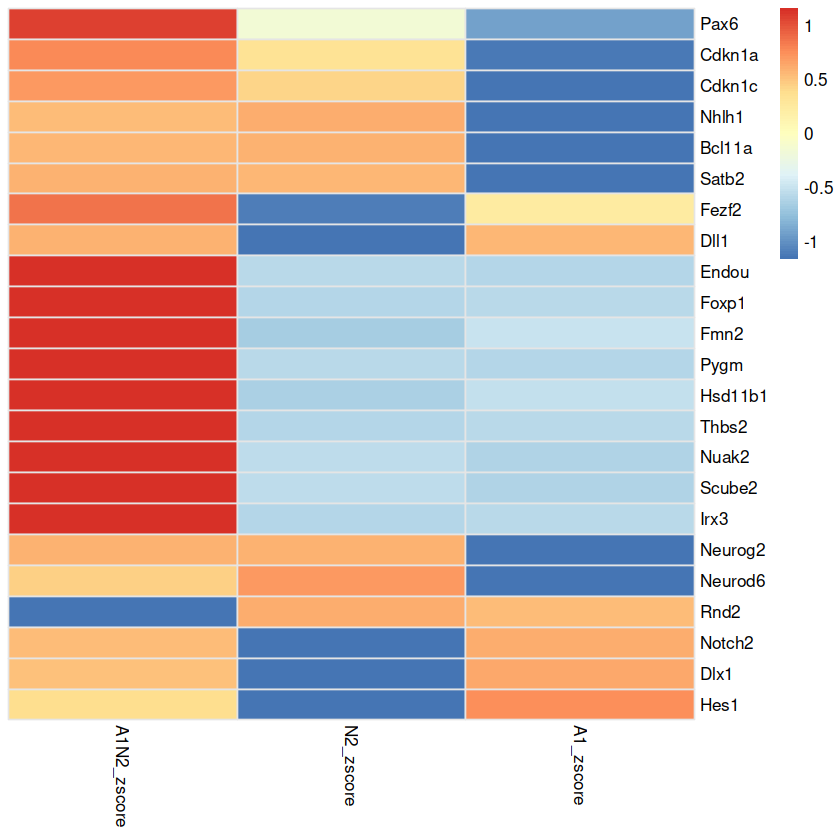

In [12]:
plot1 = pheatmap::pheatmap(mat2, cluster_rows = 0, cluster_cols = 0, 
                    border_color = 'grey90')

In [13]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(plot1, "aa-a1n2-heatmap.pdf")

pdf 
  2